In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
# from sklearn.metrics import r2_score, f1_score
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [2]:
full_data = pd.read_csv("project_data_syntax_commands.csv", index_col = 0)

In [3]:
langs_list = list(full_data["Programming_Lang"].unique())
for i, lang in enumerate(langs_list):
    full_data = full_data.replace(lang,int(i))

In [4]:
data_set = full_data.copy()
data_set.drop(["User_Name","User_img","User_url","Sol_Code","Challange_Name","Variables Names"], axis = 1, inplace = True)

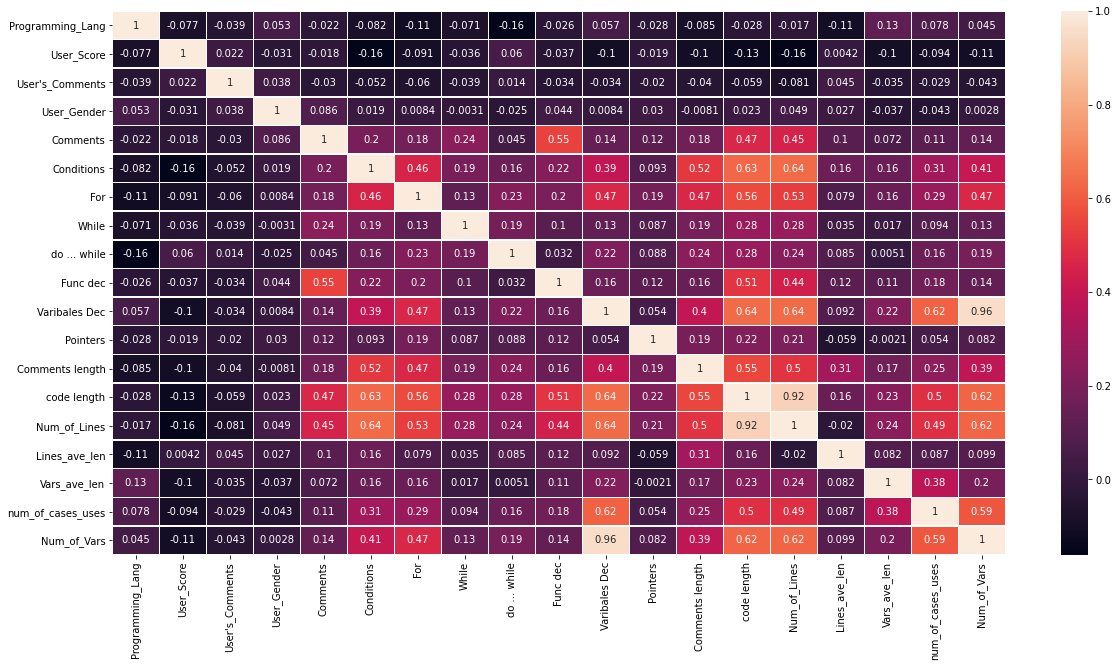

In [156]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_set.corr(), annot=True, linewidths=.5, ax=ax)

In [93]:
data_set[data_set["User_Gender"]==0]

,Programming_Lang,User_Score,User's_Comments,User_Gender,Comments,Conditions,For,While,do ... while,Func dec,Varibales Dec,Pointers,Comments length,code length,Num_of_Lines,Lines_ave_len,Vars_ave_len,num_of_cases_uses,Num_of_Vars
0,0,10,5,0,1,93,58,0,208,47,5,0,69,115,32,25,3,0,10
2,0,9,0,0,2,124,56,0,206,58,1,0,112,111,41,19,1,0,2
4,0,9,0,0,4,33,114,26,198,42,4,0,117,137,32,18,1,0,8
12,0,9,0,0,1,83,103,0,208,118,5,0,330,178,45,23,7,6,10
14,0,10,0,0,1,166,90,0,208,90,4,0,94,147,36,25,3,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,0,10,0,0,3,0,0,0,0,0,0,0,0,26,2,16,0,0,0
2657,0,10,0,0,7,0,0,0,0,0,0,0,0,29,5,15,0,0,0
2660,0,10,0,0,7,0,0,0,0,0,0,0,24,25,6,22,0,0,0
2664,0,10,0,0,3,0,0,0,0,0,0,0,134,28,2,16,0,0,0


In [86]:
male_df = data_set[data_set["User_Gender"]==0]
male_df = male_df.sample(n = 399, random_state = 2) 
drop_ind = male_df.index

In [100]:
equal_gender_data = data_set.drop(drop_ind,axis=0)

In [101]:
X = equal_gender_data.drop(["User_Gender"],axis=1).copy()
y = equal_gender_data.loc[:,"User_Gender"]
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [166]:
X_train.shape, X_test.shape

((558, 18), (240, 18))

In [167]:
clf1 = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=3)
clf2 = RandomForestClassifier(n_estimators=90, max_depth=15,min_samples_split=15)
clf3 = KNeighborsClassifier(n_neighbors=20)
clf4 = GaussianNB()

algs = ["DT","RandForest","KNN","NB"]
clfs = [clf1,clf2,clf3, clf4]

for i,clf in enumerate(clfs):
    clf.fit(X_train,y_train)
    print(algs[i])
    print("======")
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    print("accuracy on train data",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
    print("accuracy on test data",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))
    
    print(metrics.confusion_matrix(y_test,y_pred))

DT
accuracy on train data 0.6451612903225806
accuracy on test data 0.5833333333333334
[[91 35]
 [65 49]]
RandForest
accuracy on train data 0.9444444444444444
accuracy on test data 0.5541666666666667
[[62 64]
 [43 71]]
KNN
accuracy on train data 0.6272401433691757
accuracy on test data 0.5208333333333334
[[71 55]
 [60 54]]
NB
accuracy on train data 0.5376344086021505
accuracy on test data 0.5416666666666666
[[103  23]
 [ 87  27]]


In [172]:
#################################
# test if correlated columns makes the preformence better
corelated_data_set = equal_gender_data.copy()
for col in corelated_data_set.columns:
    if(col=='User_Gender'): continue
    if(data_set['User_Gender'].corr(data_set[col])<0):
        corelated_data_set.drop(col, axis=1,inplace=True)
X = corelated_data_set.drop(["User_Gender"],axis=1).copy()
y = corelated_data_set.loc[:,"User_Gender"]
# X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
clf1 = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=3)
clf2 = RandomForestClassifier(n_estimators=90, max_depth=15,min_samples_split=15)
clf3 = KNeighborsClassifier(n_neighbors=20)
clf4 = GaussianNB()

algs = ["DT","RandForest","KNN","NB"]
clfs = [clf1,clf2,clf3, clf4]

for i,clf in enumerate(clfs):
    clf.fit(X_train,y_train)
    print(algs[i])
    print("======")
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    print("accuracy on train data",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
    print("accuracy on test data",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))
    
    print(metrics.confusion_matrix(y_test,y_pred))

DT
accuracy on train data 0.6451612903225806
accuracy on test data 0.575
[[92 34]
 [68 46]]
RandForest
accuracy on train data 0.9265232974910395
accuracy on test data 0.5958333333333333
[[70 56]
 [41 73]]
KNN
accuracy on train data 0.5860215053763441
accuracy on test data 0.5333333333333333
[[81 45]
 [67 47]]
NB
accuracy on train data 0.5340501792114696
accuracy on test data 0.5333333333333333
[[108  18]
 [ 94  20]]
